In [1]:
import csv
import os
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
#accessing my code again
df_sflistings = pd.read_csv('df_sflistings.csv')
df_nyclistings = pd.read_csv('df_nyclistings.csv')

In [3]:
#running an OLS regression for SF listings

#preparing the data
X_sf = df_sflistings.drop(columns=['price'])  #independent variables
y_sf = df_sflistings['price']  #dependent variable

#adding a constant term to the independent variables matrix
X_sf = sm.add_constant(X_sf)

#fitting the OLS model
model_sf = sm.OLS(y_sf, X_sf)
results_sf = model_sf.fit()

#printing the summary statistics
print("Summary statistics for San Francisco Listings:")
print(results_sf.summary())

Summary statistics for San Francisco Listings:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.602
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.63e-36
Time:                        15:53:55   Log-Likelihood:                -51130.
No. Observations:                6774   AIC:                         1.023e+05
Df Residuals:                    6730   BIC:                         1.026e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [4]:
#running an OLS regression NYC listings

#preparing the data
X_nyc = df_nyclistings.drop(columns=['price'])  #independent variables
y_nyc = df_nyclistings['price']  #dependent variable

#adding a constant term to the independent variables matrix
X_nyc = sm.add_constant(X_nyc)

#fitting the OLS model
model_nyc = sm.OLS(y_nyc, X_nyc)
results_nyc = model_nyc.fit()

#printing the summary statistics
print("\nSummary statistics for NYC Listings:")
print(results_nyc.summary())


Summary statistics for NYC Listings:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.487
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.49e-06
Time:                        15:53:56   Log-Likelihood:            -2.0181e+05
No. Observations:               24277   AIC:                         4.041e+05
Df Residuals:                   24045   BIC:                         4.060e+05
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

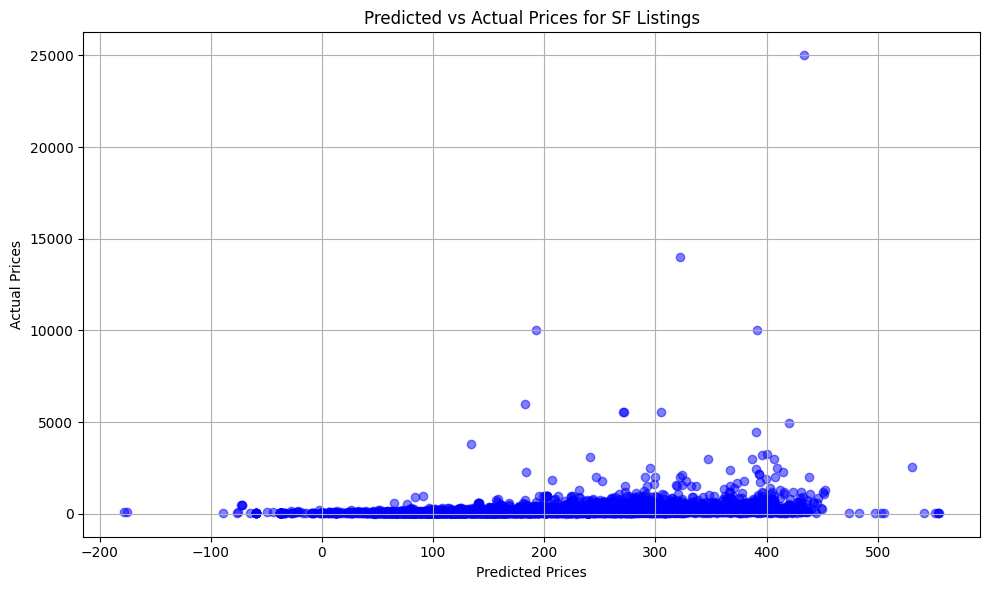

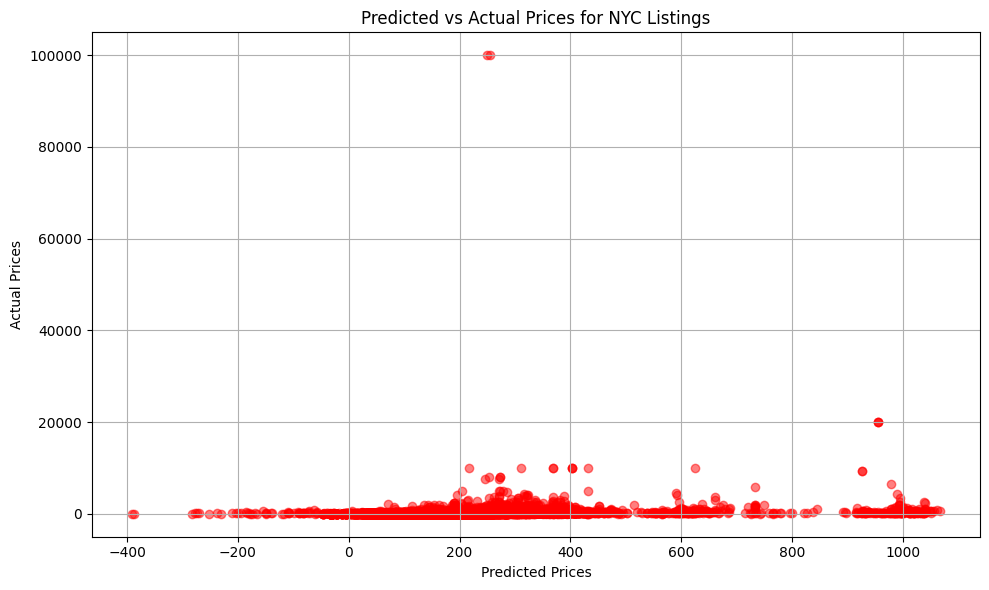

In [5]:
#plotting predicted versus actual prices for SF listings
plt.figure(figsize=(10, 6))
plt.scatter(results_sf.predict(), y_sf, color='blue', alpha=0.5)
plt.title('Predicted vs Actual Prices for SF Listings')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

#plotting predicted versus actual prices for NYC listings
plt.figure(figsize=(10, 6))
plt.scatter(results_nyc.predict(), y_nyc, color='red', alpha=0.5)
plt.title('Predicted vs Actual Prices for NYC Listings')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

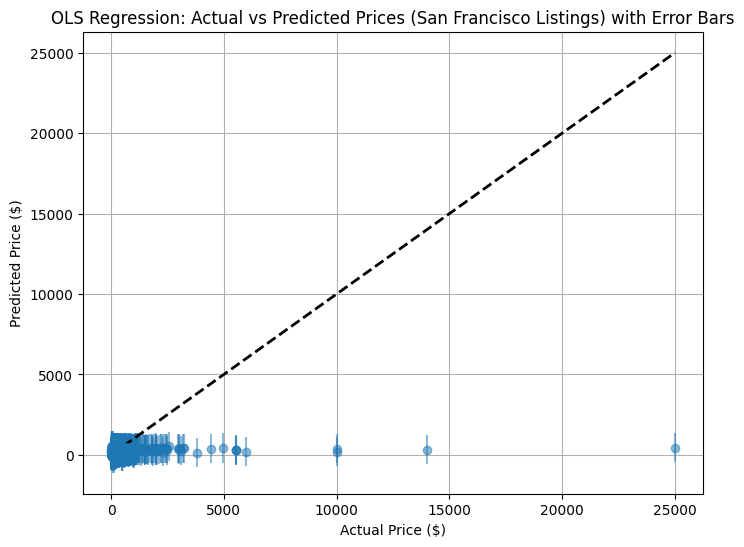

In [6]:
#plotting a graph for SF with error bars

predicted_prices_sf = results_sf.predict(X_sf)

#computing confidence intervals for predicted prices
ci_sf = results_sf.get_prediction(X_sf).summary_frame(alpha=0.05)

#extracting upper and lower confidence bounds
lower_ci_sf = ci_sf['obs_ci_lower']
upper_ci_sf = ci_sf['obs_ci_upper']

#plotting actual vs predicted prices with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(y_sf, predicted_prices_sf, yerr=[predicted_prices_sf - lower_ci_sf, upper_ci_sf - predicted_prices_sf], fmt='o', alpha=0.5)
plt.plot([y_sf.min(), y_sf.max()], [y_sf.min(), y_sf.max()], 'k--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('OLS Regression: Actual vs Predicted Prices (San Francisco Listings) with Error Bars')
plt.grid(True)
plt.show()

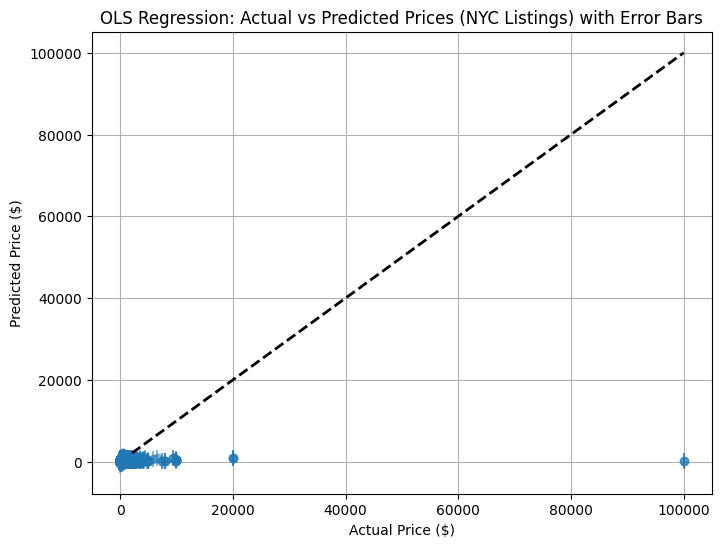

In [7]:
#plotting a graph for NYC with error bars

predicted_prices_nyc = results_nyc.predict(X_nyc)

#computing confidence intervals for predicted prices
ci_nyc = results_nyc.get_prediction(X_nyc).summary_frame(alpha=0.05)

#extracting upper and lower confidence bounds
lower_ci_nyc = ci_nyc['obs_ci_lower']
upper_ci_nyc = ci_nyc['obs_ci_upper']

#plotting actual vs predicted prices with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(y_nyc, predicted_prices_nyc, yerr=[predicted_prices_nyc - lower_ci_nyc, upper_ci_nyc - predicted_prices_nyc], fmt='o', alpha=0.5)
plt.plot([y_nyc.min(), y_nyc.max()], [y_nyc.min(), y_nyc.max()], 'k--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('OLS Regression: Actual vs Predicted Prices (NYC Listings) with Error Bars')
plt.grid(True)
plt.show()

In [8]:
#for viewing my total number of variables
print("Number of variables in the data-frame for San Francisco listings:", len(df_sflistings.columns))
print("Number of variables in the data-frame for New York City listings:", len(df_nyclistings.columns))

Number of variables in the data-frame for San Francisco listings: 44
Number of variables in the data-frame for New York City listings: 232


In [9]:
#obtaining summary statistics for my final write-up
print("Summary statistics for SF listings:")
print(df_sflistings.describe())

print("\nSummary statistics for NYC listings:")
print(df_nyclistings.describe())

Summary statistics for SF listings:
              price  minimum_nights  number_of_reviews  \
count   6774.000000     6774.000000        6774.000000   
mean     216.232211       19.271332          51.447741   
std      468.579471       43.799345         106.599721   
min       10.000000        1.000000           0.000000   
25%      100.000000        2.000000           0.000000   
50%      150.000000        3.000000           7.000000   
75%      224.000000       30.000000          49.000000   
max    25000.000000      500.000000        1166.000000   

       calculated_host_listings_count  availability_365  \
count                     6774.000000       6774.000000   
mean                        49.620165        204.502214   
std                        109.426442        122.940921   
min                          1.000000          0.000000   
25%                          1.000000         90.000000   
50%                          3.000000        215.000000   
75%                         

In [10]:
#obtaining summary statistics for my final write-up
print("Summary statistics for SF listings:")
print(df_sflistings.describe())

print("\nSummary statistics for NYC listings:")
print(df_nyclistings.describe())

Summary statistics for SF listings:
              price  minimum_nights  number_of_reviews  \
count   6774.000000     6774.000000        6774.000000   
mean     216.232211       19.271332          51.447741   
std      468.579471       43.799345         106.599721   
min       10.000000        1.000000           0.000000   
25%      100.000000        2.000000           0.000000   
50%      150.000000        3.000000           7.000000   
75%      224.000000       30.000000          49.000000   
max    25000.000000      500.000000        1166.000000   

       calculated_host_listings_count  availability_365  \
count                     6774.000000       6774.000000   
mean                        49.620165        204.502214   
std                        109.426442        122.940921   
min                          1.000000          0.000000   
25%                          1.000000         90.000000   
50%                          3.000000        215.000000   
75%                         